# Accessing metabolic pathways from KEGG and Recon3D

In this tutorial, we will introduce two databases, KEGG and Recon3D. We will be learning how to access metabolic pathways from the two databases, how to visualize metabolic pathways in different ways, and how to extract information about metabolites, enzymes, and mutations from these pathways.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import schemdraw
from schemdraw.flow import *

## Exploring metabolic pathways in KEGG

KEGG is a database resource for understanding high-level functions and utilities of the biological system, such as the cell, the organism and the ecosystem, from molecular-level information, especially large-scale molecular datasets generated by genome sequencing and other high-throughput experimental technologies.

In [2]:
import Bio
from Bio import KEGG
from Bio.KEGG import REST

### Getting pathways for data on human system

First, we define two function to 1) access KEGG pathways from Jupyter notebook, 2) get metabolic pathways from KEGG

In [3]:
def get_Kegg_pathways():
    # Retrieve all pathways from KEGG
    result = REST.kegg_list("pathway", "hsa").read()    
    pathway_list=[]
    for i in result.rstrip().split("\n"):
        pathway_list.append(i.split('\t')[0])
    # Retrieve description for each of the pathway
    pathway_description=[]
    for i in result.rstrip().split("\n"):
        pathway_description.append(i.split('\t')[1])
    # Combine pathway names and descriptions as a dataframe
    df_pathway=pd.DataFrame(zip(pathway_list, pathway_description), columns=['pathway_name', 'description'])
    return(df_pathway)

In [4]:
def get_metabolic_from_Kegg_pathways():
     # Retrieve all pathways from KEGG
    result = REST.kegg_list("pathway", "hsa").read()    
    pathway_list=[]
    for i in result.rstrip().split("\n"):
        pathway_list.append(i.split('\t')[0])
    # Retrieve description for each of the pathway
    pathway_description=[]
    for i in result.rstrip().split("\n"):
        pathway_description.append(i.split('\t')[1])
    # Combine pathway names and descriptions as a dataframe
    df_pathway=pd.DataFrame(zip(pathway_list, pathway_description), columns=['pathway_name', 'description'])
    metabolic_list=[]
    # loop over pathway list from above and only look for metabolic pathways
    for i in pathway_list:
        pathway_file = REST.kegg_get(i).read()
        for line in pathway_file.rstrip().split("\n"):
            if line[:12].strip() =='CLASS': 
                if 'Metabolism' in line:
                    metabolic_list.append(i) 
    df_metabolic_pathway=df_pathway[df_pathway.pathway_name.isin(metabolic_list)]
    return(df_metabolic_pathway)

We run the first routine, to get out a dataframe (`df_pathway`) containing all the pathways in KEGG and then a second routine to extract a dataframe only containing metabolic pathways  (`df_metabolic_pathway`)

### Collecting information for all pathways in a table

In [5]:
get_Kegg_pathways()

,pathway_name,description
0,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...
1,path:hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human)
2,path:hsa00030,Pentose phosphate pathway - Homo sapiens (human)
3,path:hsa00040,Pentose and glucuronate interconversions - Hom...
4,path:hsa00051,Fructose and mannose metabolism - Homo sapiens...
5,path:hsa00052,Galactose metabolism - Homo sapiens (human)
6,path:hsa00053,Ascorbate and aldarate metabolism - Homo sapie...
7,path:hsa00061,Fatty acid biosynthesis - Homo sapiens (human)
8,path:hsa00062,Fatty acid elongation - Homo sapiens (human)
9,path:hsa00071,Fatty acid degradation - Homo sapiens (human)


### Visualizing information for all metabolic pathways in a table

In [6]:
#This might take a while to run
get_metabolic_from_Kegg_pathways()

,pathway_name,description
0,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...
1,path:hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human)
2,path:hsa00030,Pentose phosphate pathway - Homo sapiens (human)
3,path:hsa00040,Pentose and glucuronate interconversions - Hom...
4,path:hsa00051,Fructose and mannose metabolism - Homo sapiens...
5,path:hsa00052,Galactose metabolism - Homo sapiens (human)
6,path:hsa00053,Ascorbate and aldarate metabolism - Homo sapie...
7,path:hsa00061,Fatty acid biosynthesis - Homo sapiens (human)
8,path:hsa00062,Fatty acid elongation - Homo sapiens (human)
9,path:hsa00071,Fatty acid degradation - Homo sapiens (human)


With only the pathway name, it looks vague to us. To have an intuitive view of a pathway, we can pull out the visualization for a specific pathway

### Visualizing glycolysis in KEGG

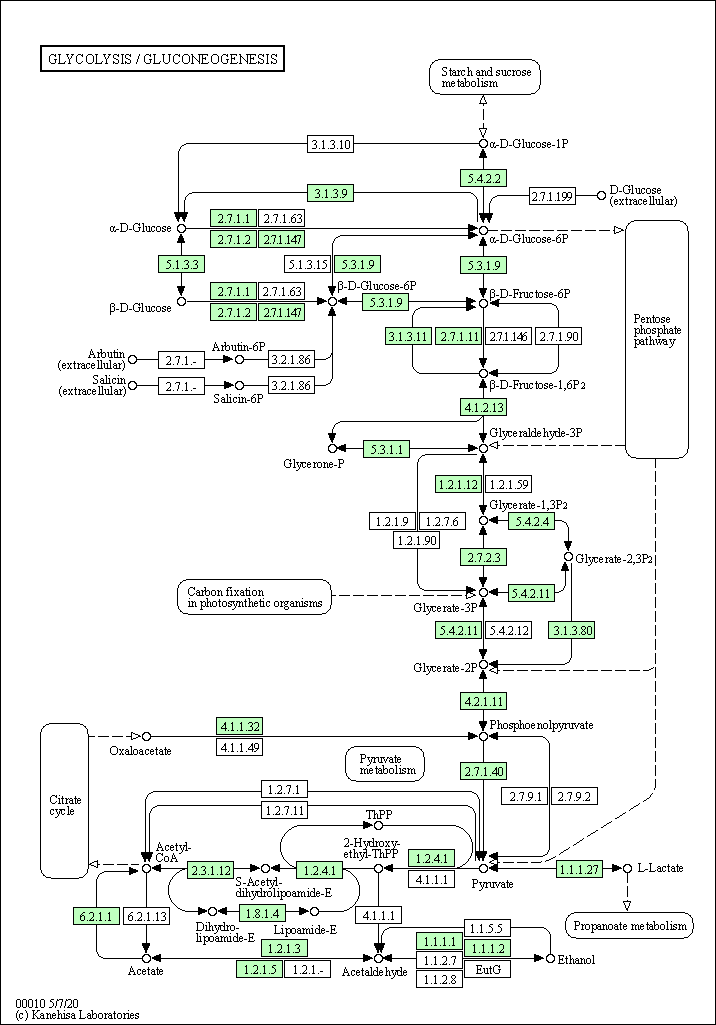

In [3]:
result = REST.kegg_get("hsa00010", "image").read()
Image(result)

### Extracting members in the glycolysis pathway:

In [4]:
def get_compounds_in_glycolysis():
    glycolysis_compounds=[]
    current_section = None
    Glycolysis_pathway = REST.kegg_get('path:hsa00010').read() 
    for line in Glycolysis_pathway.rstrip().split("\n"):
        section = line[:12].strip()  # section names are within 12 columns
        if not section == "":
            current_section = section
        if current_section == "COMPOUND":
            glycolysis_compounds.append(line[12:].split("  ")[1])
    return(glycolysis_compounds)

In [5]:
get_compounds_in_glycolysis()

['Pyruvate',
 'Acetyl-CoA',
 'D-Glucose',
 'Acetate',
 'Oxaloacetate',
 'Thiamin diphosphate',
 'Phosphoenolpyruvate',
 'Acetaldehyde',
 'D-Glucose 1-phosphate',
 'Glycerone phosphate',
 'D-Glyceraldehyde 3-phosphate',
 '(S)-Lactate',
 '3-Phospho-D-glycerate',
 'beta-D-Glucose',
 '3-Phospho-D-glyceroyl phosphate',
 'alpha-D-Glucose',
 'Ethanol',
 '2-Phospho-D-glycerate',
 'alpha-D-Glucose 6-phosphate',
 '2,3-Bisphospho-D-glycerate',
 'beta-D-Glucose 6-phosphate',
 'Salicin',
 '2-(alpha-Hydroxyethyl)thiamine diphosphate',
 'beta-D-Fructose 6-phosphate',
 'beta-D-Fructose 1,6-bisphosphate',
 'Arbutin',
 'Arbutin 6-phosphate',
 'Salicin 6-phosphate',
 'Enzyme N6-(lipoyl)lysine',
 'Enzyme N6-(dihydrolipoyl)lysine',
 '[Dihydrolipoyllysine-residue acetyltransferase] S-acetyldihydrolipoyllysine']

### Exercise 1

We have a dataframe containing mutations in different metabolic pathways. The task is to find pathogenic mutations in the dataframe. The dataframe will be loaded for you by running the code in the following row.

In [2]:
df_mutation=pd.read_csv('CHEM430_mutations_metabolic_pathways_3.csv')

### Exercise 2

 With the same dataframe, the next exercise is to find mutations in glycolysis pathway

### Exercise 3

With the same dataframe, we are interested in how many  pathogenic mutations are for each gene in the glycolysis pathway. To give you a hint for the answer, I will give you an example of how to find benign mutations in the glycolysis pathway.

<AxesSubplot:>

<Figure size 6400x1200 with 0 Axes>

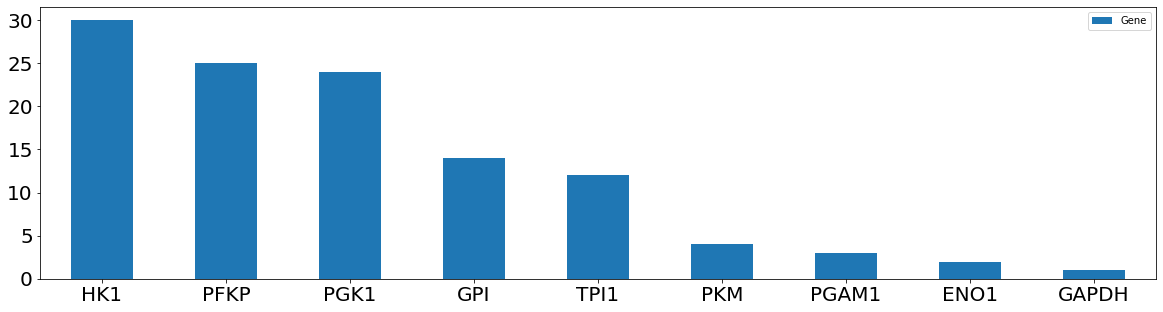

In [3]:
figure(figsize = (80, 15), dpi = 80)
df_benign_glycolysis=pd.DataFrame(df_mutation[(df_mutation.Pathway=='Glycolysis') & (df_mutation['Clinical significance']=='Benign') ]['Gene'].value_counts())
df_benign_glycolysis.plot.bar(fontsize=20, figsize=(20,5), rot=0)

Now you can look for the number of pathogenic mutations for each gene in the glycolysis pathway

If we would like to visualize metabolites as well as the enzymes (genes) catalyzing each step of the reaction, below is a diagram of the glycolysis pathway. Metabolites are shown as rectangular and enzymes(genes) are shown as pill shape.

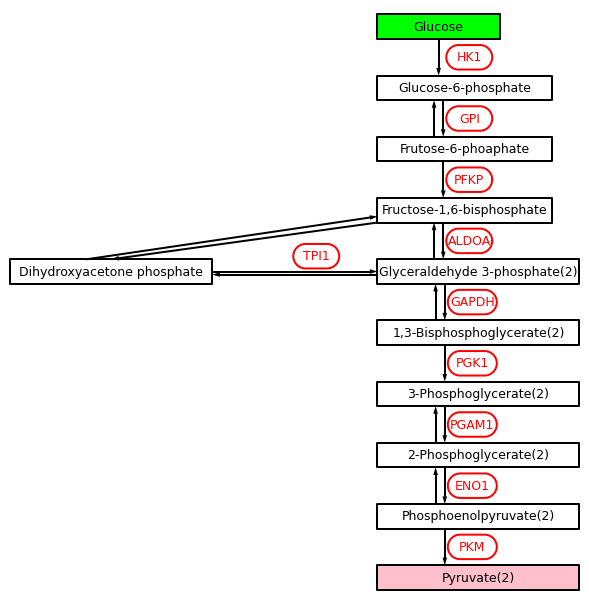

In [4]:
with schemdraw.Drawing() as d:
    d += (glucose := flow.Box(w=4, h=0.8).label('Glucose').fill('lime'))
    d += (step2 := flow.Box(w=5.7, h=0.8).label('Glucose-6-phosphate')).at((0,-2))
    d += (step3 := flow.Box(w=5.7, h=0.8).label('Frutose-6-phoaphate')).at((0,-4))
    d += (step4 := flow.Box(w=5.7, h=0.8).label('Fructose-1,6-bisphosphate')).at((0,-6))
    d += (step5 := flow.Box(w=6.6, h=0.8).label('Glyceraldehyde 3-phosphate(2)')).at((0,-8))
    d += (step6 := flow.Box(w=6.6, h=0.8).label('Dihydroxyacetone phosphate')).at((-12,-8))
    d += (step7 := flow.Box(w=6.6, h=0.8).label('1,3-Bisphosphoglycerate(2)')).at((0, -10))
    d += (step8 := flow.Box(w=6.6, h=0.8).label('3-Phosphoglycerate(2)')).at((0, -12))
    d += (step9 := flow.Box(w=6.6, h=0.8).label('2-Phosphoglycerate(2)')).at((0, -14))
    d += (step10 := flow.Box(w=6.6, h=0.8).label('Phosphoenolpyruvate(2)')).at((0, -16))
    d += (step11 := flow.Box(w=6.6, h=0.8).label('Pyruvate(2)').fill('pink').at((0, -18)))
    d += (arrow1 := Arrow().at(glucose.S)).to((glucose.S[0], step2.N[1]))
    d += (HK1 := flow.Start(w=1.5, h=0.8).label('HK1').color('red')).at((3,-0.6))
    d += (arrow2 := Arrow().at((step2.S[0]-0.7, step2.S[1])).to((step2.S[0]-0.7, step3.N[1])))
    d += (arrow3 := Arrow().at((step2.S[0]-1, step3.N[1])).to((step2.S[0]-1, step2.S[1])))
    d += (GPI := flow.Start(w=1.5, h=0.8).label('GPI').color('red')).at((3,-2.6))
    d += (arrow4 := Arrow().at((step3.S[0]-0.7, step3.S[1])).to((step3.S[0]-0.7, step4.N[1])))
    d += (PFKP := flow.Start(w=1.5, h=0.8).label('PFKP').color('red')).at((3,-4.6))
    d += (arrow5 := Arrow().at((step4.S[0]-0.7, step4.S[1])).to((step4.S[0]-0.7, step5.N[1])))
    d += (arrow6 := Arrow().at((step4.S[0]-1, step5.N[1])).to((step4.S[0]-1, step4.S[1])))
    d += (ALDOA := flow.Start(w=1.5, h=0.8).label('ALDOA').color('red')).at((3,-6.6))
    d += (arrow7 := Arrow().at(step4.SW).to(step6.N)) 
    d += (arrow8 := Arrow().at((step6.N[0]-0.8, step6.N[1])).to((step4.SW[0], step4.SW[1]+0.2)))
    d += (arrow9 := Arrow().at(step6.E).to(step5.W))
    d += (arrow10 := Arrow().at((step5.W[0], step5.W[1]-0.1)).to((step6.E[0], step6.E[1]-0.1)))
    d += (TPI1 := flow.Start(w=1.5, h=0.8).label('TPI1').color('red')).at((-2,-7.1))
    d += (arrow11 := Arrow().at((step5.S[0]-1.1, step5.S[1])).to((step5.S[0]-1.1, step7.N[1])))
    d += (arrow12 := Arrow().at((step7.N[0]-1.4, step7.N[1])).to((step5.S[0]-1.4, step5.S[1])))
    d += (GAPDH := flow.Start(w=1.6, h=0.8).label('GAPDH').color('red')).at((3.1,-8.6))
    d += (arrow13 := Arrow().at((step7.S[0]-1.1, step7.S[1])).to((step7.S[0]-1.1, step8.N[1])))
    d += (PGK1 := flow.Start(w=1.6, h=0.8).label('PGK1').color('red')).at((3.1,-10.6))
    d += (arrow14 := Arrow().at((step8.S[0]-1.1, step8.S[1])).to((step8.S[0]-1.1, step9.N[1])))
    d += (arrow15 := Arrow().at((step9.N[0]-1.4, step9.N[1])).to((step8.S[0]-1.4, step8.S[1])))
    d += (PGAM1 := flow.Start(w=1.6, h=0.8).label('PGAM1').color('red')).at((3.1,-12.6))
    d += (arrow16 := Arrow().at((step9.S[0]-1.1, step9.S[1])).to((step9.S[0]-1.1, step10.N[1])))
    d += (arrow17 := Arrow().at((step10.N[0]-1.4, step10.N[1])).to((step9.S[0]-1.4, step9.S[1])))
    d += (ENO1 := flow.Start(w=1.6, h=0.8).label('ENO1').color('red')).at((3.1,-14.6))
    d += (arrow18 := Arrow().at((step10.S[0]-1.1, step10.S[1])).to((step10.S[0]-1.1, step11.N[1])))
    d += (PKM := flow.Start(w=1.6, h=0.8).label('PKM').color('red')).at((3.1,-16.6))

Now we would like to color enzymes (genes) in the glycolysis pathway based on the number of **benign** mutations from the dataframe `df_mutation`. A darker color indicates more pathogenic mutations in the gene and vice versa.

<AxesSubplot:>

<Figure size 6400x1200 with 0 Axes>

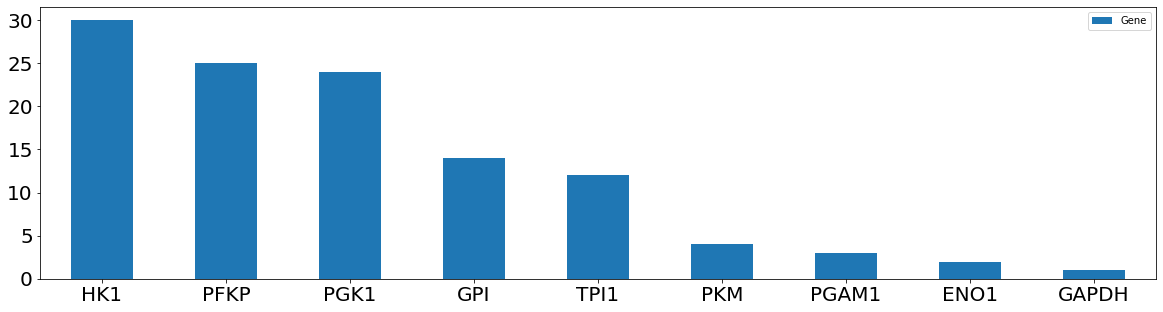

In [5]:
figure(figsize = (80, 15), dpi = 80)
df_benign_glycolysis=pd.DataFrame(df_mutation[(df_mutation.Pathway=='Glycolysis') & (df_mutation['Clinical significance']=='Benign') ]['Gene'].value_counts())
df_benign_glycolysis.plot.bar(fontsize=20, figsize=(20,5), rot=0)

By analyzing the barplot above, we can set up a few ranges with different colors. For example, we set mutation number 0-5 as #FFBABA; 5-10  #FF7B7B;  10-15  #FF5252; 15-20  #FF0000; 20-30  #A70000. (These numbers are color hex values, together they form a gradient of red colors from light to dark.)

Then we map different ranges to the colors:

In [6]:
criteria = [df_benign_glycolysis['Gene'].between(0, 5), df_benign_glycolysis['Gene'].between(5, 10), df_benign_glycolysis['Gene'].between(10, 15), df_benign_glycolysis['Gene'].between(15, 20), df_benign_glycolysis['Gene'].between(20, 30)]
values = ['#FFBABA', '#FF7B7B', '#FF5252', '#FF0000', '#A70000']

df_benign_glycolysis['Color'] = np.select(criteria, values, 0)

In [7]:
df_benign_glycolysis

,Gene,Color
HK1,30,#A70000
PFKP,25,#A70000
PGK1,24,#A70000
GPI,14,#FF5252
TPI1,12,#FF5252
PKM,4,#FFBABA
PGAM1,3,#FFBABA
ENO1,2,#FFBABA
GAPDH,1,#FFBABA


Then, we make the diagram again with the number of mutations indicated as node color for each enzyme (gene) in the glycolysis pathway. All you need to do is to add `fill('color hex value')` at the end of  code line for **each gene**.
Hint: for the gene(s) without benign/pathogenic mutations, you can just leave it/them.

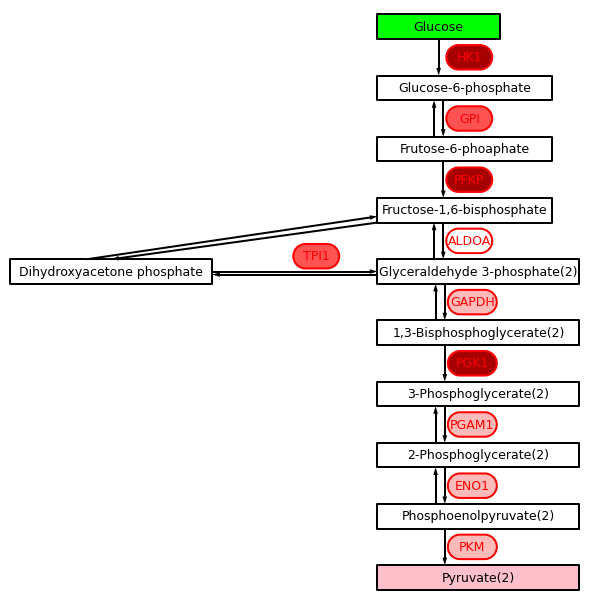

In [8]:
with schemdraw.Drawing() as d:
    d += (glucose := flow.Box(w=4, h=0.8).label('Glucose').fill('lime'))
    d += (step2 := flow.Box(w=5.7, h=0.8).label('Glucose-6-phosphate')).at((0,-2))
    d += (step3 := flow.Box(w=5.7, h=0.8).label('Frutose-6-phoaphate')).at((0,-4))
    d += (step4 := flow.Box(w=5.7, h=0.8).label('Fructose-1,6-bisphosphate')).at((0,-6))
    d += (step5 := flow.Box(w=6.6, h=0.8).label('Glyceraldehyde 3-phosphate(2)')).at((0,-8))
    d += (step6 := flow.Box(w=6.6, h=0.8).label('Dihydroxyacetone phosphate')).at((-12,-8))
    d += (step7 := flow.Box(w=6.6, h=0.8).label('1,3-Bisphosphoglycerate(2)')).at((0, -10))
    d += (step8 := flow.Box(w=6.6, h=0.8).label('3-Phosphoglycerate(2)')).at((0, -12))
    d += (step9 := flow.Box(w=6.6, h=0.8).label('2-Phosphoglycerate(2)')).at((0, -14))
    d += (step10 := flow.Box(w=6.6, h=0.8).label('Phosphoenolpyruvate(2)')).at((0, -16))
    d += (step11 := flow.Box(w=6.6, h=0.8).label('Pyruvate(2)').fill('pink').at((0, -18)))
    d += (arrow1 := Arrow().at(glucose.S)).to((glucose.S[0], step2.N[1]))
    d += (HK1 := flow.Start(w=1.5, h=0.8).label('HK1').color('red')).at((3,-0.6)).fill('#A70000')
    d += (arrow2 := Arrow().at((step2.S[0]-0.7, step2.S[1])).to((step2.S[0]-0.7, step3.N[1])))
    d += (arrow3 := Arrow().at((step2.S[0]-1, step3.N[1])).to((step2.S[0]-1, step2.S[1])))
    d += (GPI := flow.Start(w=1.5, h=0.8).label('GPI').color('red')).at((3,-2.6)).fill('#FF5252')
    d += (arrow4 := Arrow().at((step3.S[0]-0.7, step3.S[1])).to((step3.S[0]-0.7, step4.N[1])))
    d += (PFKP := flow.Start(w=1.5, h=0.8).label('PFKP').color('red')).at((3,-4.6)).fill('#A70000')
    d += (arrow5 := Arrow().at((step4.S[0]-0.7, step4.S[1])).to((step4.S[0]-0.7, step5.N[1])))
    d += (arrow6 := Arrow().at((step4.S[0]-1, step5.N[1])).to((step4.S[0]-1, step4.S[1])))
    d += (ALDOA := flow.Start(w=1.5, h=0.8).label('ALDOA').color('red')).at((3,-6.6))
    d += (arrow7 := Arrow().at(step4.SW).to(step6.N)) 
    d += (arrow8 := Arrow().at((step6.N[0]-0.8, step6.N[1])).to((step4.SW[0], step4.SW[1]+0.2)))
    d += (arrow9 := Arrow().at(step6.E).to(step5.W))
    d += (arrow10 := Arrow().at((step5.W[0], step5.W[1]-0.1)).to((step6.E[0], step6.E[1]-0.1)))
    d += (TPI1 := flow.Start(w=1.5, h=0.8).label('TPI1').color('red')).at((-2,-7.1)).fill('#FF5252')
    d += (arrow11 := Arrow().at((step5.S[0]-1.1, step5.S[1])).to((step5.S[0]-1.1, step7.N[1])))
    d += (arrow12 := Arrow().at((step7.N[0]-1.4, step7.N[1])).to((step5.S[0]-1.4, step5.S[1])))
    d += (GAPDH := flow.Start(w=1.6, h=0.8).label('GAPDH').color('red')).at((3.1,-8.6)).fill('#FFBABA')
    d += (arrow13 := Arrow().at((step7.S[0]-1.1, step7.S[1])).to((step7.S[0]-1.1, step8.N[1])))
    d += (PGK1 := flow.Start(w=1.6, h=0.8).label('PGK1').color('red')).at((3.1,-10.6)).fill('#A70000')
    d += (arrow14 := Arrow().at((step8.S[0]-1.1, step8.S[1])).to((step8.S[0]-1.1, step9.N[1])))
    d += (arrow15 := Arrow().at((step9.N[0]-1.4, step9.N[1])).to((step8.S[0]-1.4, step8.S[1])))
    d += (PGAM1 := flow.Start(w=1.6, h=0.8).label('PGAM1').color('red')).at((3.1,-12.6)).fill('#FFBABA')
    d += (arrow16 := Arrow().at((step9.S[0]-1.1, step9.S[1])).to((step9.S[0]-1.1, step10.N[1])))
    d += (arrow17 := Arrow().at((step10.N[0]-1.4, step10.N[1])).to((step9.S[0]-1.4, step9.S[1])))
    d += (ENO1 := flow.Start(w=1.6, h=0.8).label('ENO1').color('red')).at((3.1,-14.6)).fill('#FFBABA')
    d += (arrow18 := Arrow().at((step10.S[0]-1.1, step10.S[1])).to((step10.S[0]-1.1, step11.N[1])))
    d += (PKM := flow.Start(w=1.6, h=0.8).label('PKM').color('red')).at((3.1,-16.6)).fill('#FFBABA')

### Exercise 4

The task is to color enzymes (genes) in the glycolysis pathway based on the number of **pathogenic** mutations from the dataframe `df_mutation`. A darker color indicates more pathogenic mutations in the gene and vice versa.

## Exploring Recon3D database

`Recon3D` is an updated and expanded human metabolic network reconstruction that integrates pharmacogenomic associations, large-scale phenotypic data, and structural information for both proteins and metabolites. Recon3D can be used to functionally characterize mutations associated with disease, and identify metabolic response signatures that are caused by exposure to certain drugs. `Recon3D` represents the most comprehensive human metabolic network model to date, accounting for 3,288 open reading frames, 13,543 metabolic reactions involving 4,140 unique metabolites, and 12,890 protein structures. These data provide a unique resource for investigating molecular mechanisms of human metabolism.

In [9]:
#Load the Recon3D reaction dataframe
df_recon3d=pd.read_excel('../../Desktop/EBrunk/Review paper/Supplementary Data File S2.xlsx', sheet_name='Table S12')

In [10]:
#Load the Recon3D metabolite dataframe
df_recon3d_metabolites=pd.read_excel('../../Desktop/EBrunk/Review paper/Supplementary Data File S2.xlsx', sheet_name='Table S15')

Across all the columns, `m_subsystem` is the subsystem that a reaction and its associated genes and compounds are involved in. We can see each subsystem as an individual pathway.

### Listing all the subsystems in the Recon3D database

In [11]:
df_recon3d.m_subsystem.unique().tolist()

['Beta-Alanine metabolism',
 'Transport, extracellular',
 'Eicosanoid metabolism',
 'Steroid metabolism',
 'Vitamin D metabolism',
 'Glycine, serine, alanine and threonine metabolism',
 'Methionine and cysteine metabolism',
 'Lysine metabolism',
 'Valine, leucine, and isoleucine metabolism',
 'Propanoate metabolism',
 'Fatty acid oxidation',
 'Tryptophan metabolism',
 'Tyrosine metabolism',
 'Transport, mitochondrial',
 'Sphingolipid metabolism',
 'Butanoate metabolism',
 'Purine catabolism',
 'Taurine and hypotaurine metabolism',
 'Arginine and proline metabolism',
 'Cytochrome metabolism',
 'O-glycan metabolism',
 'Blood group synthesis',
 'Glutamate metabolism',
 'Transport, lysosomal',
 'Cholesterol metabolism',
 'Transport, endoplasmic reticular',
 'Exchange/demand reaction',
 'Aminosugar metabolism',
 'Phosphatidylinositol phosphate metabolism',
 'Urea cycle',
 'Glycerophospholipid metabolism',
 'Citric acid cycle',
 'Pyruvate metabolism',
 'Vitamin B2 metabolism',
 'Glycolysis/g

### Extracting genes involved in the glycolysis pathway

In [12]:
df_recon3d[df_recon3d.m_subsystem=='Glycolysis/gluconeogenesis'].u_gene_name.unique()

array(['ACYP2', 'ACYP1', 'ADH6', 'ADHFE1', 'ADH4', 'ADH5', 'ZADH2',
       'ADH7', 'ADH1C', 'ADH1B', 'ADH1A', 'AKR1A1', 'ALDH3B1', 'ALDH9A1',
       'ALDH1A3', 'ALDH1B1', 'ALDH3B2', 'ALDH3A2', 'ALDH1A1', 'ALDH3A1',
       'ALDH7A1', 'ALDH2', 'CAT', 'G6PC3', 'G6PC2', 'G6PC', 'PGAM2',
       'BPGM', 'PGAM1', 'ENO2', 'ENO3', 'ENO1', 'CYP2E1', 'ALDOB',
       'ALDOA', 'FBP1', 'FBP2', 'GAPDHS', 'GAPDH', 'GCK', 'HK1', 'HK2',
       'HK3', 'LDHAL6B', 'LDHAL6A', 'LDHC', 'LDHA', 'LDHB', 'PDHA2',
       'PDHA1', 'DLD', 'PDHB', 'PCK1', 'PFKP', 'GPI', 'PGK2', 'PGK1',
       'PGM1', 'PKM', 'PKLR', 'GPD1', 'TPI1'], dtype=object)

###  Visualizing the glycolysis pathway

A chunk of codes preparing for `Glycolysis` visualization:

In [13]:
dict_glycolysis={}
for k in df_recon3d[df_recon3d.m_subsystem=='Glycolysis/gluconeogenesis'].m_metabolites.unique().tolist():
    dict_glycolysis[df_recon3d.loc[df_recon3d.m_metabolites==k, 'm_reaction'].tolist()[0]]= [i for i in k.split("'") if i not in  ['[',  ', ', ']', 'h2o[c]', 'h[c]', 'nad[m]', 'nadh[m]', 'nadph[c]', 'nadh[c]', 'h2o[m]', 'nadh[c]', 'nadp[c]', 'o2[c]', 'nad[c]', 'co2[c]', 'h[m]', 'coa[c]', 'coa[m]', 'co2[m]']]
#Import networkx package for creating graphs
import networkx as nx
G1 = nx.MultiGraph() 
list_glycolysis =[] # create empty list
for val in dict_glycolysis.values():
    for i in val:
        if i in list_glycolysis: 
            continue
        else:
            list_glycolysis.append(i)
list_glycolysis_name=[]
for i in list_glycolysis:
    list_glycolysis_name.append(df_recon3d_metabolites.loc[df_recon3d_metabolites['BiGG ID']==i, 'Name'].tolist()[0])
df_1=pd.DataFrame(zip(list_glycolysis,list_glycolysis_name), columns=['bigg_ID', 'Name'])
df_2=df_1.drop_duplicates('Name')
# Add nodes and node attributes
for i in df_2.Name.tolist():
    G1.add_node(i)
from itertools import combinations
list_combination=list(combinations(df_2.bigg_ID.tolist(), 2))
for i in list_combination:
    for k in dict_glycolysis.keys():
        if all(item in dict_glycolysis[k] for item in  list(i)):
            G1.add_edge(df_1.loc[df_1.bigg_ID==i[0], 'Name'].tolist()[0],  df_1.loc[df_1.bigg_ID==i[1], 'Name'].tolist()[0])

The actual codes to make the glycolysis plot are shown below. In the plot, each node is a metabolite. Two nodes are connected if they exist in one reaction.

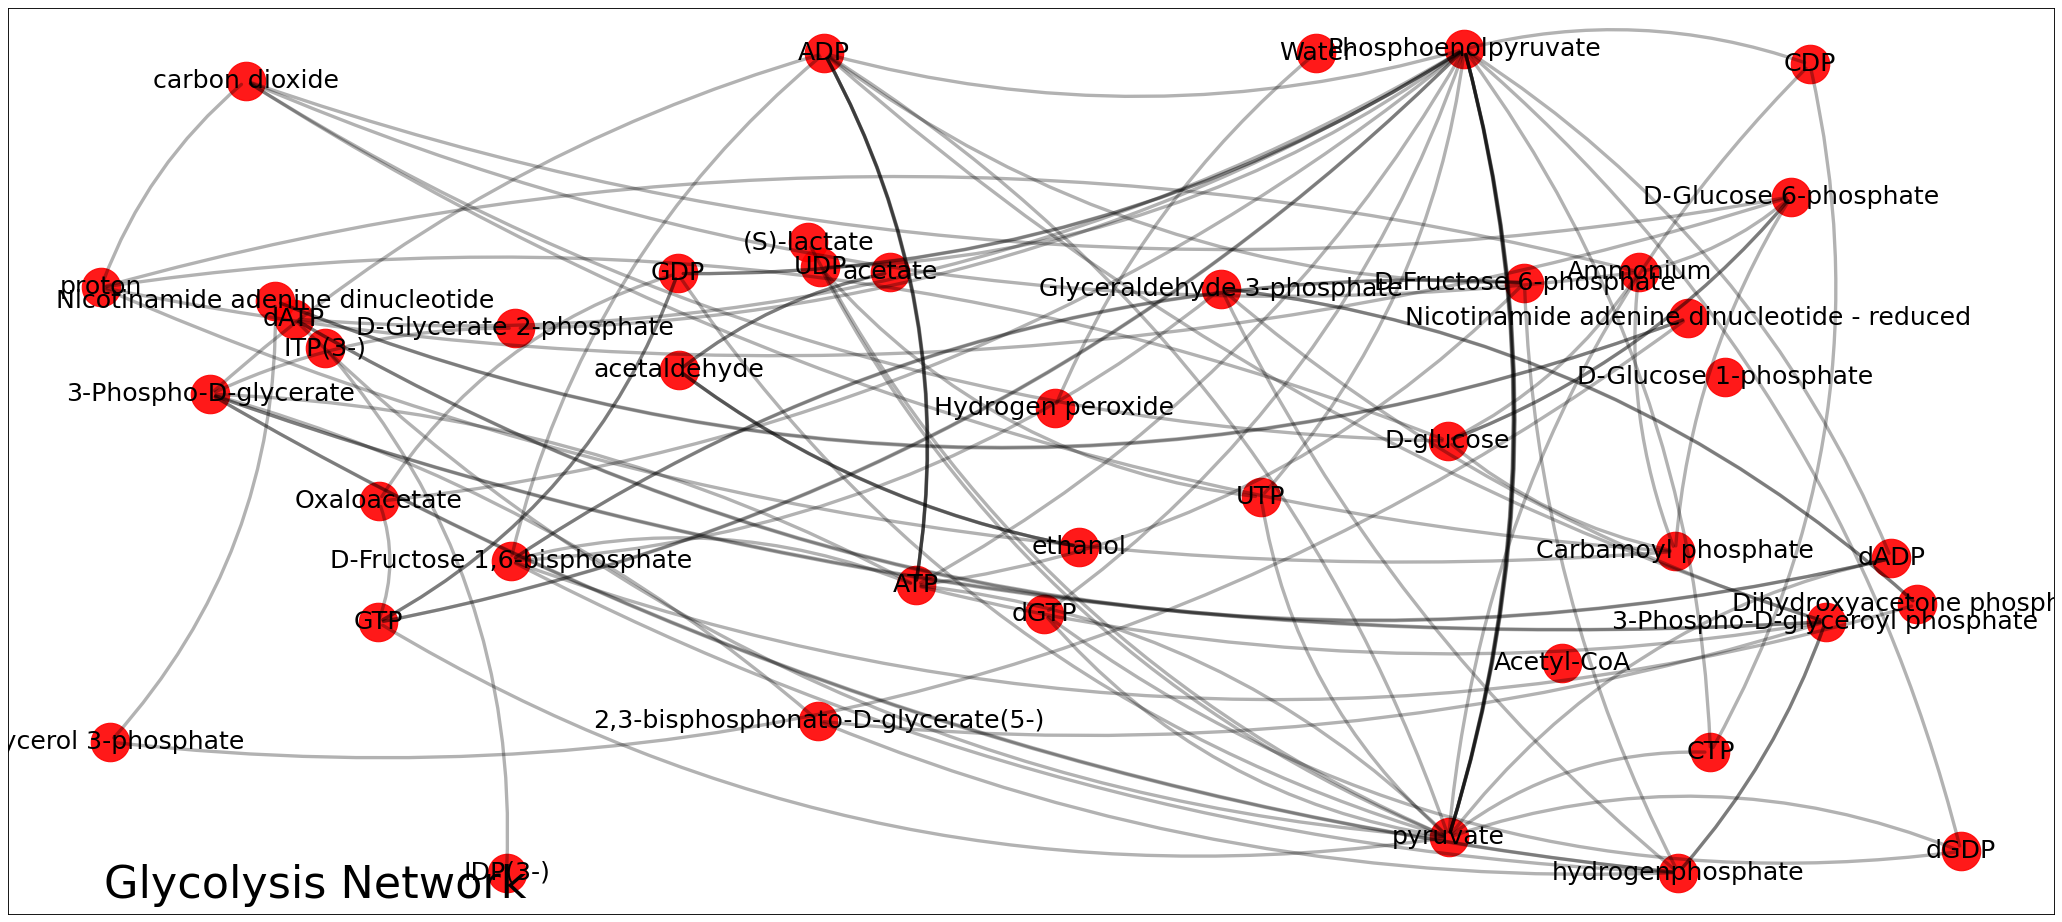

In [14]:
figure(figsize = (33, 15), dpi = 80)
pos = nx.random_layout(G1, seed=6)
nx.draw_networkx_nodes(G1, pos, node_color = 'r', node_size = 1200, alpha = 0.9)
nx.draw_networkx_labels(G1,pos, font_size=22.7, font_color='black')
ax = plt.gca()
for e in range(0, len(list(G1.edges()))):
    ax.annotate("",
                xy=pos[list(G1.edges())[e][0]],
                xytext=pos[list(G1.edges())[e][1]],
                arrowprops=dict(arrowstyle="-",
                                alpha=0.3, lw=3, shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.001*e+0.1))
                                ),
                               )
plt.title('Glycolysis Network', x=0.15, y=0.01, fontsize=40)
plt.show()

**Acknowledgement:** This tutorial was developed by Yue Wang at the University of North Carolina at Chapel Hill.